In [36]:
# PCA for individuals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [37]:
# Get our latest dataframe

AgeDB_images = pd.read_csv("createdCSV/AgeDB_result.csv")
AgeDB_images

,Unnamed: 0,ID,Name,Gender,First Image,First Age,First Age Range,Second Image,Second Age,Second Age Range,First Image Features,Second Image Features,Cosine Similarity
0,0,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10044_HelenHunt_32_f.jpg,32,31-40,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-2.34069191e-02 -3.43213081e-02 5.58017269e-...,0.637691
1,1,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10045_HelenHunt_33_f.jpg,33,31-40,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-0.02852621 -0.01994888 0.02602013 -0.039852...,0.615305
2,2,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10046_HelenHunt_34_f.jpg,34,31-40,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-1.90598574e-02 1.06462231e-03 4.85058613e-...,0.713908
3,3,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10057_HelenHunt_44_f.jpg,44,41-50,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-0.03781101 -0.05119143 0.08856339 -0.027030...,0.887338
4,4,3,HelenHunt,0,10058_HelenHunt_45_f.jpg,45,41-50,10047_HelenHunt_34_f.jpg,34,31-40,[-0.02452355 -0.04986161 0.10224585 -0.004617...,[-4.50187288e-02 -1.33672869e-02 3.94325182e-...,0.572509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177421,523,566,ElkeSommer,0,9971_ElkeSommer_62_f.jpg,62,61-70,9960_ElkeSommer_42_f.jpg,42,41-50,[ 2.33288780e-02 -9.15972292e-02 -2.28940696e-...,[ 0.04827074 0.00928634 -0.01057999 0.039533...,0.467892
177422,524,566,ElkeSommer,0,9971_ElkeSommer_62_f.jpg,62,61-70,9946_ElkeSommer_18_f.jpg,18,11-20,[ 2.33288780e-02 -9.15972292e-02 -2.28940696e-...,[-4.79027145e-02 3.94340046e-02 6.72460347e-...,0.170420
177423,525,566,ElkeSommer,0,9973_ElkeSommer_64_f.jpg,64,61-70,9960_ElkeSommer_42_f.jpg,42,41-50,[ 3.15611204e-03 -5.97761460e-02 -4.79066037e-...,[ 0.04827074 0.00928634 -0.01057999 0.039533...,0.481166
177424,526,566,ElkeSommer,0,9973_ElkeSommer_64_f.jpg,64,61-70,9946_ElkeSommer_18_f.jpg,18,11-20,[ 3.15611204e-03 -5.97761460e-02 -4.79066037e-...,[-4.79027145e-02 3.94340046e-02 6.72460347e-...,0.248497


In [38]:
CASIA_images = pd.read_csv("/proj/snic2021-22-918/CASIA_result.csv")
CASIA_images

,Unnamed: 0,ID,Gender,First Image,First Age,First Age Range,Second Image,Second Age,Second Age Range,First Image Features,Second Image Features,Cosine Similarity
0,0,2,1,000002_00000273.jpg,44.5,41-50,000002_00000274.jpg,46.0,41-50,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[ 0.06495494 -0.01069948 -0.02760548 0.046603...,0.528167
1,1,2,1,000002_00000273.jpg,44.5,41-50,000002_00000275.jpg,56.0,51-60,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[ 2.98649985e-02 2.47298833e-02 6.24481738e-...,0.579516
2,2,2,1,000002_00000273.jpg,44.5,41-50,000002_00000276.jpg,31.5,31-40,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[-0.05003019 -0.04056443 0.09071848 -0.004077...,0.500336
3,3,2,1,000002_00000273.jpg,44.5,41-50,000002_00000277.jpg,34.5,31-40,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[-5.25349379e-02 -8.33794102e-02 8.54413584e-...,0.397464
4,4,2,1,000002_00000273.jpg,44.5,41-50,000002_00000279.jpg,46.0,41-50,[ 4.14859205e-02 4.65242751e-02 4.07880312e-...,[-9.69949812e-02 -2.99791265e-02 6.55681491e-...,0.645424
...,...,...,...,...,...,...,...,...,...,...,...,...
2280266,523,10553,1,010553_00490113.jpg,34.0,31-40,010553_00490115.jpg,26.0,21-30,[ 6.78437725e-02 7.66028464e-02 -2.29133125e-...,[ 0.00634021 0.00241421 -0.02715038 -0.018446...,0.527963
2280267,524,10553,1,010553_00490113.jpg,34.0,31-40,010553_00490116.jpg,36.5,31-40,[ 6.78437725e-02 7.66028464e-02 -2.29133125e-...,[ 3.47039513e-02 5.25199063e-02 -6.54469337e-...,0.595495
2280268,525,10553,1,010553_00490114.jpg,34.5,31-40,010553_00490115.jpg,26.0,21-30,[ 3.76005359e-02 4.49786857e-02 2.15231832e-...,[ 0.00634021 0.00241421 -0.02715038 -0.018446...,0.509435
2280269,526,10553,1,010553_00490114.jpg,34.5,31-40,010553_00490116.jpg,36.5,31-40,[ 3.76005359e-02 4.49786857e-02 2.15231832e-...,[ 3.47039513e-02 5.25199063e-02 -6.54469337e-...,0.602436


In [39]:
# Function that produce a PCA plot for a ID person

def pca_individual_plot(df_im, id, dataset='Not specified'):
    df_individual = df_im.loc[df_im["ID"] == id]

    list_of_individual_images = np.unique(df_individual["First Image"].to_list())

    column_list_individual = ['feat' + str(i) for i in range(512)] + ['target (age range)']
    df_features_individual = pd.DataFrame(columns=column_list_individual)

    for filename in list_of_individual_images:
        feature_vector = df_individual.loc[df_individual["First Image"] == filename, "First Image Features"].values[0]
        age_range = df_individual.loc[df_individual["First Image"] == filename, "First Age Range"].values[0]
        feature_vector = feature_vector[1:-1].split(" ")
        feat = []
        for i in feature_vector:
            if len(i) != 0:
                i = i.replace("\n", "")
                feat.append(float(i))
        feat.append(age_range)
        df_features_individual.loc[len(df_features_individual)] = feat

    features_list_individual = column_list_individual[:-1]

    # Separating out the features
    X_individual = df_features_individual.loc[:, features_list_individual].values

    # Standardizing the features
    X_individual = StandardScaler().fit_transform(X_individual)

    pca_individual = PCA(n_components = 2)

    principalComponents_individual = pca_individual.fit_transform(X_individual)

    df_principal_individual = pd.DataFrame(data = principalComponents_individual
                , columns = ['Principal Component 1', 'Principal Component 2'])

    df_pca_result_individual = pd.concat([df_principal_individual, df_features_individual[['target (age range)']]], axis = 1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    overhead_title = str(dataset) + ' - ' + 'ID: ' + str(id)
    ax.set_title(overhead_title, fontsize = 20)
    targets = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
    colors = ['r', 'b', 'y', 'g', 'm', 'c', 'k', 'dimgray']
    for target, color in zip(targets,colors):
        indicesToKeep = df_pca_result_individual['target (age range)'] == target
        ax.scatter(df_pca_result_individual.loc[indicesToKeep, 'Principal Component 1']
                , df_pca_result_individual.loc[indicesToKeep, 'Principal Component 2']
                , c = color
                , s = 40)
    ax.legend(targets)
    ax.grid()

    return pca_individual.explained_variance_ratio_
        
    

In [40]:
AgeDB_unique_ids = np.unique(AgeDB_images["ID"].to_list())
CASIA_unique_ids = np.unique(CASIA_images["ID"].to_list())

array([0.14099761, 0.10640329])

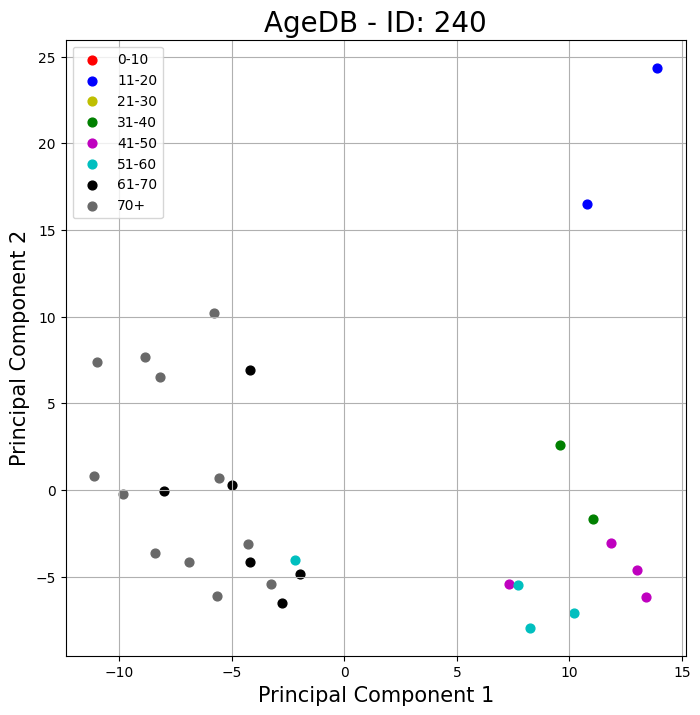

In [41]:
# Randomize by using np.random.choice(AgeDB_unique_ids)
pca_individual_plot(AgeDB_images, 240, dataset='AgeDB')

array([0.12928618, 0.07117607])

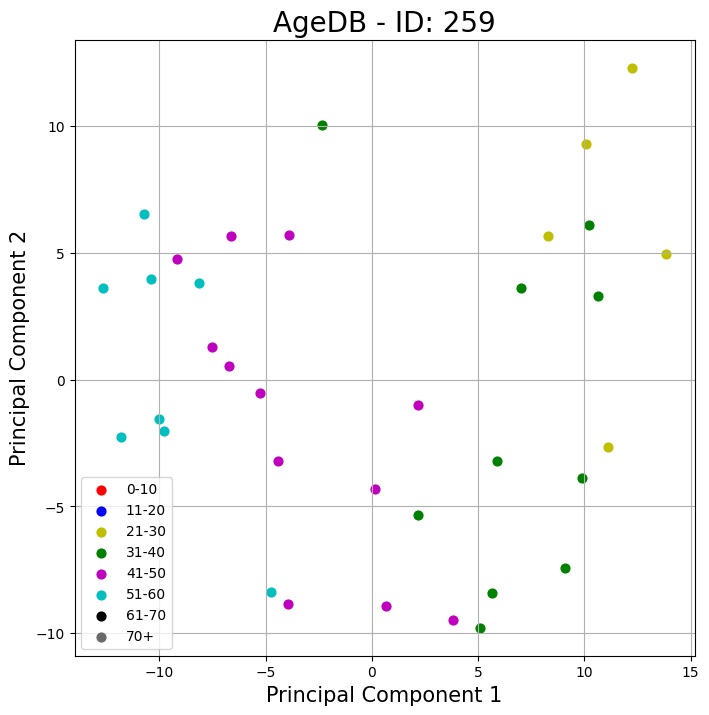

In [42]:
# Randomize by using np.random.choice(AgeDB_unique_ids)
pca_individual_plot(AgeDB_images, 259, dataset='AgeDB')

array([0.09005008, 0.07231243])

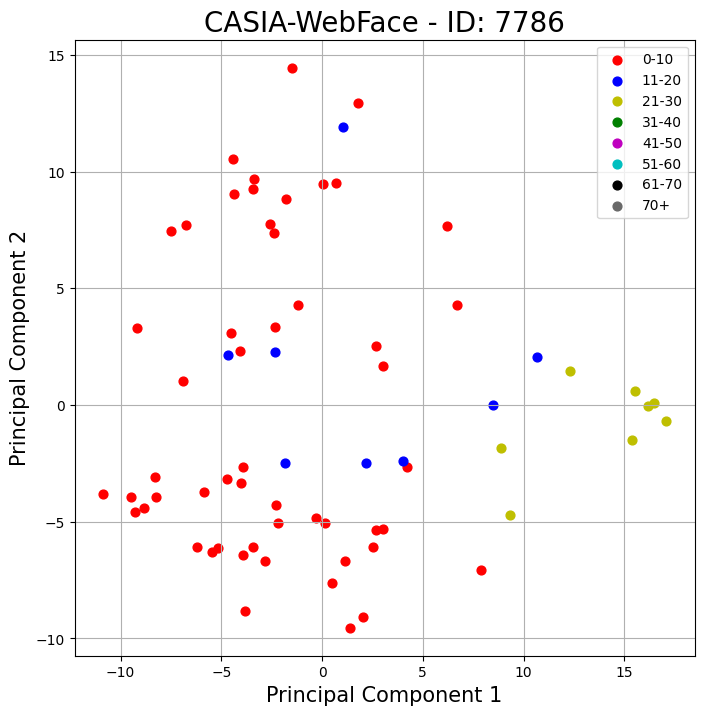

In [43]:
# Randomize by using np.random.choice(CASIA_unique_ids)
pca_individual_plot(CASIA_images, 7786, dataset='CASIA-WebFace')

array([0.13889969, 0.09065219])

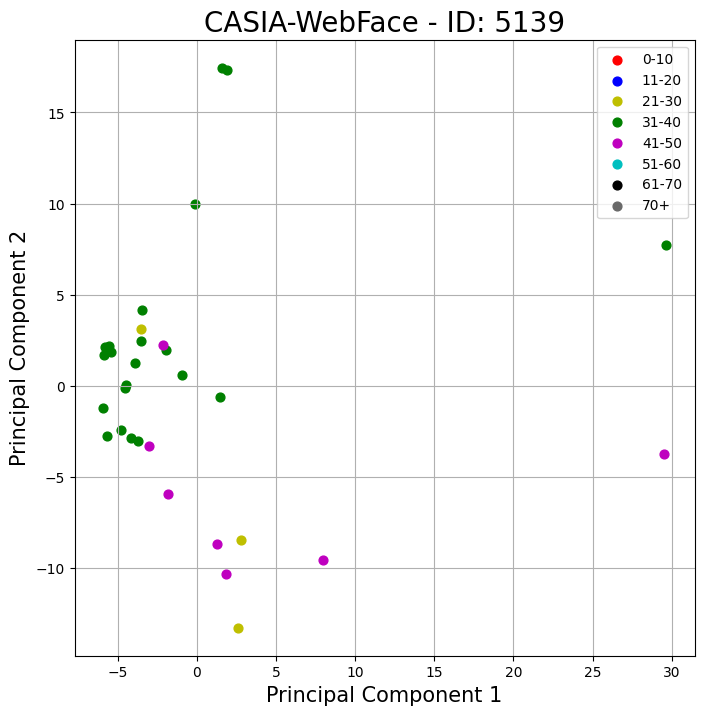

In [44]:
# Randomize by using np.random.choice(CASIA_unique_ids)
pca_individual_plot(CASIA_images, 5139, dataset='CASIA-WebFace')